### **Bike Sharing**

[Sumber data Bike Sharing](https://drive.google.com/drive/folders/17Mw_4wSRiBB5vLLQJN137AlAbyB3CLFx) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Sistem berbagi sepeda adalah generasi baru dari persewaan sepeda tradisional yang seluruh prosesnya, mulai dari keanggotaan, penyewaan, dan pengembalian, menjadi otomatis. Melalui sistem tersebut, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi pada posisi lain. Saat ini, terdapat sekitar lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan, dan kesehatan.

Terlepas dari penerapan sistem berbagi sepeda di dunia nyata yang menarik, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, keberangkatan, dan posisi kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem bike sharing menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas dalam kota. Oleh karena itu, peristiwa-peristiwa terpenting di kota tersebut diharapkan dapat dideteksi dengan memantau data ini.

**Problem Statement**

Dengan permintaan penggunaan bike sharing yang terus meningkat, penempatan ketersedian sepeda yang stabil disetiap lokasi menjadi hal yang sangat diperhitungkan. Bila mana ketersedian disuatu lokasi tidak seimbang dengan perminat pengguna sepeda, maka para pesepeda akan menunggu waktu hingga ketersedian sepeda tersedia kembali, kondisi seperti ini akan membuat para pesepeda mencari alternatif lain seperti menggunakan transpotasi lain sehingga kondisi ini akan mengurangi pendapatan penyedia. sedangkan jika menempatkan sepeda yang lebih banyak disuatu lokasi yang kurang efektif akan juga berdampak bagi pengeluaran biaya yang tinggi. oleh karena itu **permintaan dari para pesepeda harus diimbangi dengan tingkat ketersedian sepeda disetiap lokasi yang akan dipertimbangkan dari segi waktu dan kondisi, sehingga penyedia dapat menyediakan kapasitas sepeda yang cukup saat dibutuhkan dan mengurangi ketersedian sepeda pada suatu lokasi yang kurang efektif.**

**Goals**

Berdasarkan permasalahan tersebut, penyedia bike sharing perlu memiliki prediksi tolls **guna memprediksi jumlah pengguna bike share pada lokasi dan kondisi tertentu seperti mempertimbangkan cuaca, hari , musim dan lainya**. Harapanya dengan adanya prediksi tolls ini dapat membantu penyedia sepeda untuk menempatkan sepeda-sepeda ke lokasi yang lebih efektif hall ini juga akan meningkatkan potensi pedapatan penyedia dan kepercayaan terhadap pengguna layanan bike share.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu kondisi dengan yang lainnya, dengan mempertimbangkan kondisi tersebut menempatkan jumlah sepeda yang tepat pada lokasi yang berpotensi tinggi terhadap pengguna. 

Selanjutnya, akan dibuat suatu model regresi yang bertujuan untuk menentukan jumlah unit sepeda yang diperlu disediakan oleh penyedia bike share. 

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi banyaknya permintaan bike sharing dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

- Dataset merupakan data Bike Sharing di kota Washington, Dc pada tahun **2011** sapai dengan **2012**.
- Setiap baris data merepresentasikan informasi terkait waktu penyewa, kondisi lingkungan dan banyaknya pengguna sepeda yang disewa.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | object | date  |
| season | Integer |1: winter, 2: spring, 3: summer, 4: fall|
| hr | Integer | hour (0 to 23) |
| holiday | Interger | 0:not holiday, 1:holiday |
| temp | Float | normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8,  t_max=+39 (only in hourly scale)|
| atemp | Float | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| hum | Float | normalized humidity. The values are divided into 100 (max) |
| casual | Integer | count of casual users |
| registered | Integer | count of registered users |
| cnt | Integer | count of total rental bikes including both casual and registered |
| weathersit | Integer | 1: Clear, Few clouds, Partly cloudy, Partly cloudy| 
|||2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist,|
|||3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloud, 
|||4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
<br>

In [915]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt 

import warnings
warnings.filterwarnings('ignore')

In [916]:
# Load dataset
df = pd.read_csv('..data/data_bike_sharing.csv')
df.head(10)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
5,2012-10-01,0.72,1,0,4,0.4545,0.46,0,6,39,45
6,2012-08-28,0.54,1,0,3,0.6515,0.70,22,20,196,216
7,2012-01-01,0.93,1,0,1,0.2727,0.26,9,13,27,40
8,2011-10-13,1.00,2,0,4,0.5152,0.54,4,2,5,7
9,2012-06-09,0.24,1,0,2,0.6970,0.82,16,219,315,534


In [917]:
#ukuran data(shape)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Dari info data diatas memiliki 12165 baris dengan 11 kolom.

#### **Exploratory Data Analysis**

**Distribution of Bike Share Count of total**

Text(0.5, 1.0, 'Count Distribution Plot')

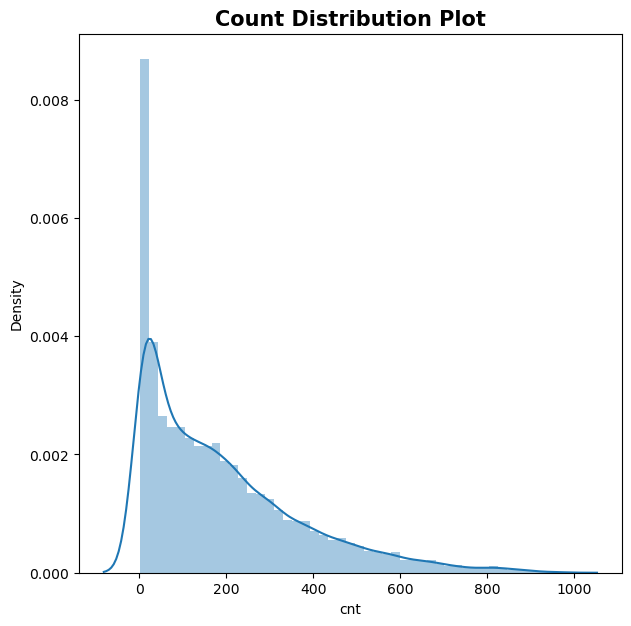

In [918]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['cnt'])
plt.title('Count Distribution Plot', size=15, weight='bold')

Berdasarkan plot distribusi count bike sharing di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur cnt ( jumlah pengguna sepeda keseluruhan baik casual dan register ).

### Count of Season

In [919]:
#mencari count season paling ramai pesepeda
df_season = df.groupby(df['season']).agg({'cnt': 'sum'}).rename(columns={'index' : 'season', 'cnt': 'jumlah'}).reset_index()
df_season['season'] = df_season['season'].replace({1: 'winter', 2 : 'spring', 3 : 'summer', 4 : 'fall'})
df_season

,season,jumlah
0,winter,334839
1,spring,639704
2,summer,742488
3,fall,585451


In [920]:
# Membuat bar chart dengan Altair
bar_chart = alt.Chart(df_season,title=alt.Title(
       "Musim Paling Diminati",
       subtitle="Berdasarkan jumlah pesepeda casual dan register"
   )).mark_bar().encode(
    x=alt.X('season:O', title='Musim',sort='-y', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('jumlah:Q', title='Jumlah Pesepeda'),
    color=alt.Color('season:N')
).properties(
    width=600,
    height=400
)

# Menambahkan layer text untuk menampilkan jumlah value di setiap bar
text = bar_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-5  # Penyesuaian posisi teks agar berada di atas bar
).encode(
    text='jumlah:Q'  # Menampilkan jumlah count di setiap bar
)

chart_with_text = (bar_chart + text)  # Menggabungkan chart bar dan text

chart_with_text

alt.LayerChart(...)

Dengan adanya visualisasi diatas inside yang kita dapat yaitu bahwasanya **para pesepeda lebih cenderung bersepeda pada musim summer hingga fall dan menurun pada saat winter.**

faktor musim disini mempengaruhi para pesepeda untuk menggunakan layanan bike sharing ini.

### Count of holiday

In [921]:
# Grouping holiday unutk melihat para pengguna sepeda disisi holiday
df_holiday = df.groupby(['holiday']).agg({'cnt' : 'sum'}).rename(columns={'index' : 'holiday','day' : 'day', 'cnt' : 'jumlah'}).reset_index()
df_holiday['holiday'] = df_holiday['holiday'].replace({0: 'not holiday', 1:'holiday'})
df_holiday

,holiday,jumlah
0,not holiday,2245297
1,holiday,57185


Degan adanya data diatas bisa kita ambil kesimpulan bahwa **rata-rata para pengguna pesepeda pada saat non holiday sebanyak 2245297 yang berbanding jauh dengan hari holiday sebanyak 57185 pesepeda.**

pengertian dari data set ini holiday dan non holiday yaitu waktu libur yang mempertimbangkan weakends dan hari libur nasional pada negara amerika ini maka dari itu untuk membuktikan maka kita akan mengali lebih dalam pada colom jam serta hari.

### Count of Hours

In [922]:
df_jam = df.groupby(['hr']).agg({'cnt':'sum'}).rename(columns={'index' : 'hr' , 'cnt' : 'jumlah'}).reset_index()
df_jam.T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
jumlah,28083,16367,11237,5479,3052,10593,38818,105676,188576,108286,...,123209,126154,157226,234861,213468,156731,118007,86003,67622,45918


In [923]:
# Membuat line chart dengan Altair
line_chart = alt.Chart(df_jam, title=alt.Title(
       "Tren Pesepeda Perjam",
       subtitle="Berdasarkan jumlah pesepeda casual dan register"
   )).mark_line(point=True).encode(
    x=alt.X('hr:O', title='Jam', sort='x', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('jumlah:Q', title='Jumlah Pesepeda'),
    color=alt.value('green')
).properties(
    width=800,
    height=400
)

# Menambahkan layer text untuk menampilkan jumlah value di setiap titik line chart
text = line_chart.mark_text(
    align='center',
    baseline='top',
    dx=5,  # Penyesuaian posisi teks agar berada di sebelah kanan titik
    dy=-13,
    color='black',  # Warna teks
    fontSize=10  # Ukuran font teks
).encode(
    text='jumlah:Q'  # Menampilkan jumlah count di setiap titik
)

chart_with_text = (line_chart + text)  # Menggabungkan chart line dan text

chart_with_text

alt.LayerChart(...)

Dari hasil visualisasi diatas insade yang kita dapat yaitu **tren pada jam 8 pagi menunjukan kenaikan kemudian turun dengan signifikan kemudian pada jam 17 mengalami kenaikan kembali yang signifikan**.

Disini kita dapat pola bahwasanya pengguna bike sharing menggunakan sepeda pada jam kerja dan jam pulang kerja.

### Count of weaks

In [924]:
df['dteday'] = pd.to_datetime(df['dteday'])
# Menambahkan kolom 'day_of_week' berdasarkan 'dteday'
df['week'] = df['dteday'].dt.day_name()

# Mengelompokkan data berdasarkan 'day_of_week' dan 'hr'
df_per_minggu = df.groupby(['week', 'hr']).agg({'cnt': 'sum'}).reset_index()
df_per_minggu = df_per_minggu.rename(columns={'cnt': 'jumlah'})

# Mengurutkan hari dalam seminggu
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_per_minggu['week'] = pd.Categorical(df_per_minggu['week'], categories=days_order, ordered=True)
df_per_minggu = df_per_minggu.sort_values(['week', 'hr'])

Untuk melihat lebih dalam lagi dikarenakan pada kolom holiday mengumpulan hari weakends dan hari libur nasional maka saya akan menggali lebih dalam pada kolom dteday yang mengsepesifikan kita ambil perminggunya selama dua tahun guna melihat tren para pengguna menggunakan bike sharing pada hari apa saja.

In [925]:
# Membuat line chart dengan Altair untuk menampilkan jumlah pesepeda per jam dalam satu minggu
line_chart = alt.Chart(df_per_minggu).mark_line(point=True).encode(
    x=alt.X('hr:O', title='Jam', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('jumlah:Q', title='Jumlah Pesepeda'),
    color=alt.Color('week:N', legend=alt.Legend(title="Hari dalam Minggu")),
    tooltip=['week:N', 'hr:O', 'jumlah:Q']
).properties(
    title=alt.TitleParams(
        text="Jumlah Pesepeda Per Jam dalam Satu Minggu",
        subtitle="Berdasarkan keseluruhan data pengguna register dan casual",
    ),
    width=800,
    height=400
)

line_chart

alt.Chart(...)

Bisa kita lihat seksama bahwasanya para pengguna bike sharing ini lebih cenderung menggunakan layanan sepede pada waktu weakdays dan menurun pada saat weeakends dan polanya berbeda dengan hari weakdays yang memuncak pada jam 12 siang.

Hasil insade yang didapat setelah melakukan keseluruhan visualisasi dapat kita simpulkan sebagai berikut :
1. Para pesepeda lebih cenderung menggunakan sepeda pada musim summer hingga fall dan menurun pada saat winter
2. Banyaknya para pengguna pesepeda pada saat non holiday sebanyak 2245297 yang berbanding jauh dengan hari holiday sebanyak 57185 pesepeda.
3. Kemudian kenbiasaan para pengguna sepeda juga ramai pada jam 8 pagi hingga jam 17 sore pada hari weakdays sedangkan untuk weeakends memuncak pada jam 12 siang, yang dimana bisa kita simpulan bahwasanya pengguna bike sharing ini mayoritas para pekerja dan sekolah.

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [926]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [927]:
display(df_model.head(), df_model.tail())

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,week
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,Friday
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,Sunday
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,Wednesday
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,Saturday
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,Tuesday


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,week
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257,Wednesday
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102,Friday
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6,Monday
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69,Saturday
12164,2011-04-28,0.47,1,0,2,0.6212,0.64,18,44,486,530,Thursday


In [928]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,datetime64[ns],0,0.0,731,"[2012-04-02T00:00:00.000000000, 2011-08-12T00:..."
1,hum,float64,0,0.0,89,"[0.54, 0.88]"
2,weathersit,int64,0,0.0,4,"[2, 1]"
3,holiday,int64,0,0.0,2,"[0, 1]"
4,season,int64,0,0.0,4,"[4, 2]"
5,atemp,float64,0,0.0,65,"[0.1364, 0.8636]"
6,temp,float64,0,0.0,50,"[0.52, 0.36]"
7,hr,int64,0,0.0,24,"[3, 19]"
8,casual,int64,0,0.0,305,"[163, 131]"
9,registered,int64,0,0.0,742,"[66, 444]"


Dari info dataset di atas, tidak terdapat data yang kosong pada beberapa fitur atau kolom.

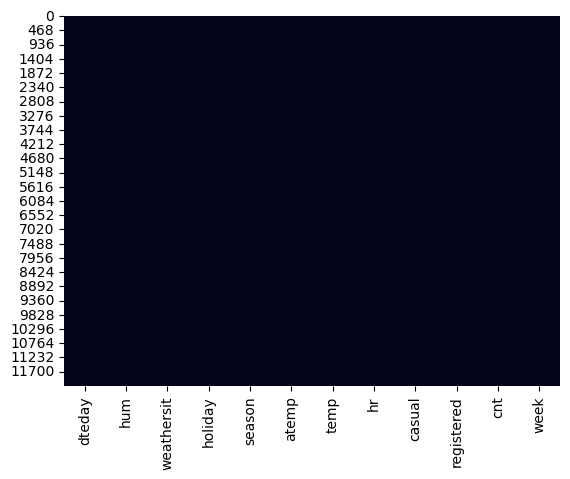

In [929]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Bisa kita lihat bahwasanya data yang kita kelola tidak memiliki missing value diantara fitur tersebut, maka saya akan melanjutkan proses selanjutnya.

Kita juga dapat mengetahui bahwa tidak ada data yang duplikat pada dataset dengan melihat jumlah data unik dari setiap fitur , di mana jumlah data uniknya sama dengan jumlah keseluruhan data. Oleh karena itu, dataset ini tidak memiliki data yang duplikat. Untuk memastikannya, kita bisa cek dengan menggunakan function duplicated().

In [930]:
# Cek data duplikat
df_model.duplicated().sum()

0

**Drop Columns**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Jika ditinjau berdasar domain knowledge dan kebutuhan pemodelan ada beberapa fitur yang tidak relevan dengan permasalahan seperti, fitur 'dteday', 'register', 'casual', dan 'day_of_week' tidak diperlukan lagi karena dteday sudah saya pecah menjadi per minggu, sedangkan fitur register dan casual tidak dibutuhkan karena sudah diwakili oleh fitur cnt.

In [931]:
# Drop beberapa kolom yang tidak diperlukan
df_model.drop(['dteday', 'registered', 'casual',], axis=1, inplace=True)

In [932]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         12165 non-null  float64
 1   weathersit  12165 non-null  int64  
 2   holiday     12165 non-null  int64  
 3   season      12165 non-null  int64  
 4   atemp       12165 non-null  float64
 5   temp        12165 non-null  float64
 6   hr          12165 non-null  int64  
 7   cnt         12165 non-null  int64  
 8   week        12165 non-null  object 
dtypes: float64(3), int64(5), object(1)
memory usage: 855.5+ KB


Sekarang kolom 'dteday', 'registered' 'hum' dan 'casual' sudah tidak ada.


**Missing Value**

In [933]:
# Cek nilai missing value
df_model.isnull().sum()

hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
cnt           0
week          0
dtype: int64

lagi-lagi setelah melakukan drop fitur yang tidak diperlukan alhasil data yang saya ingin gunakan tidak mengandung missing value dengan bukti diatas.

In [934]:
# Merubah tipe data day yang object menjadi int
day_to_int = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

# Mengonversi kolom 'day' ke tipe int menggunakan mapping
df_model['week'] = df_model['week'].replace(day_to_int)

In [935]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt,week
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,189.271023,3.013810
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,181.223903,1.997731
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,1.000000,0.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,40.000000,1.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,142.000000,3.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,282.000000,5.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,970.000000,6.000000


Sejauh ini melihat data kita dengan deskriptif statistiknya tidak ada keanehan dari segi fitur yang akan kita bangun dari segi nilai minimun dan maximum hingga std dari masing masing fitur.

In [936]:
# Cek kembali dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         12165 non-null  float64
 1   weathersit  12165 non-null  int64  
 2   holiday     12165 non-null  int64  
 3   season      12165 non-null  int64  
 4   atemp       12165 non-null  float64
 5   temp        12165 non-null  float64
 6   hr          12165 non-null  int64  
 7   cnt         12165 non-null  int64  
 8   week        12165 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 855.5 KB


**Data Correlation**

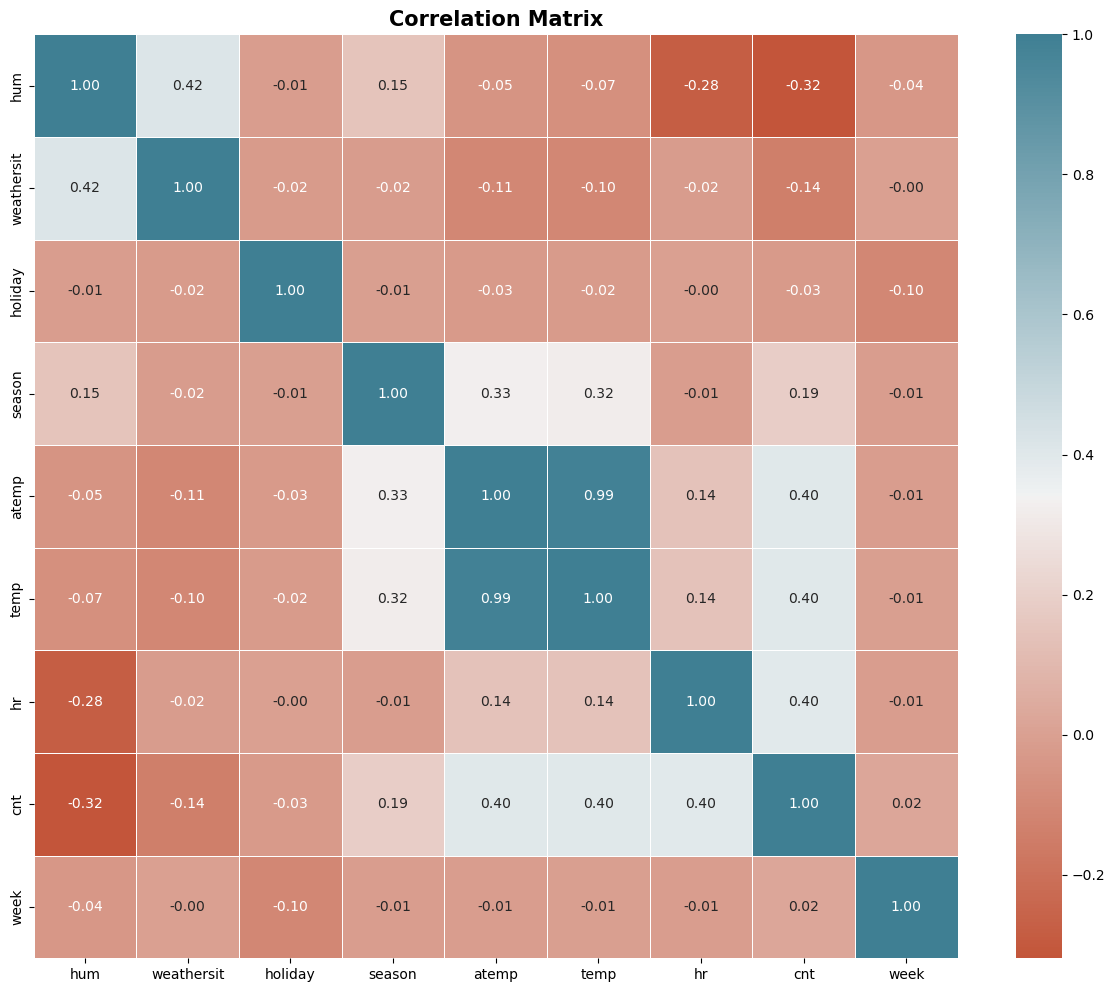

In [937]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur cnt. Korelasi paling tinggi dimiliki oleh fitur 'temp, atemp dan hr', di mana korelasinya adalah korelasi positif. Ini berarti semakin atemp dan temp semakin tinggi maka akan semakin banyak pengguna sepeda pada saat itu.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

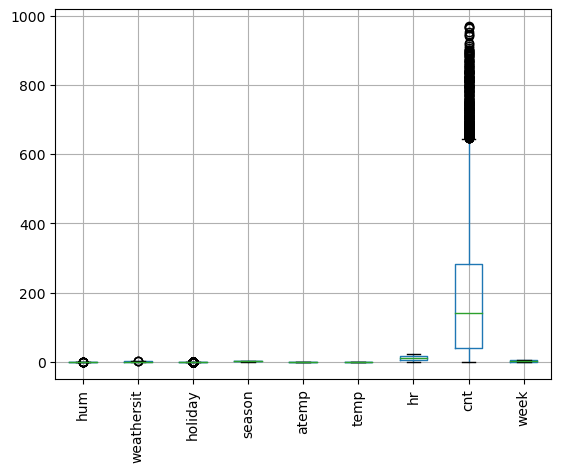

In [938]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [939]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [940]:
# Outliers pada fitur cnt
find_anomalies(df_model['cnt'])

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


In [941]:
# Outliers pada fitur weathersit
find_anomalies(df_model['weathersit'])

IQR: 1.0
limit_bawah: -0.5
limit_atas: 3.5


In [942]:
# Outliers pada fitur holiday
find_anomalies(df_model['holiday'])

IQR: 0.0
limit_bawah: 0.0
limit_atas: 0.0


In [943]:
# Outliers pada fitur season
find_anomalies(df_model['season'])

IQR: 1.0
limit_bawah: 0.5
limit_atas: 4.5


In [944]:
# Outliers pada fitur atemp
find_anomalies(df_model['atemp'])

IQR: 0.2879
limit_bawah: -0.09854999999999997
limit_atas: 1.0530499999999998


In [945]:
# Outliers pada fitur temp
find_anomalies(df_model['temp'])

IQR: 0.32
limit_bawah: -0.13999999999999996
limit_atas: 1.1400000000000001


In [946]:
# Outliers pada fitur hr
find_anomalies(df_model['hr'])

IQR: 12.0
limit_bawah: -12.0
limit_atas: 36.0


In [947]:
# Outliers pada fitur week
find_anomalies(df_model['week'])

IQR: 4.0
limit_bawah: -5.0
limit_atas: 11.0


In [948]:
# Outliers pada fitur week
find_anomalies(df_model['hum'])

IQR: 0.31000000000000005
limit_bawah: 0.004999999999999893
limit_atas: 1.245


In [953]:
df_model[df_model['hum']  > 0.10].count()['cnt']

12098

In [954]:
df_model['hum'].describe()

count    12098.000000
mean         0.628151
std          0.189085
min          0.210000
25%          0.480000
50%          0.620000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

Text(0.5, 0, 'Range Selected Hum')

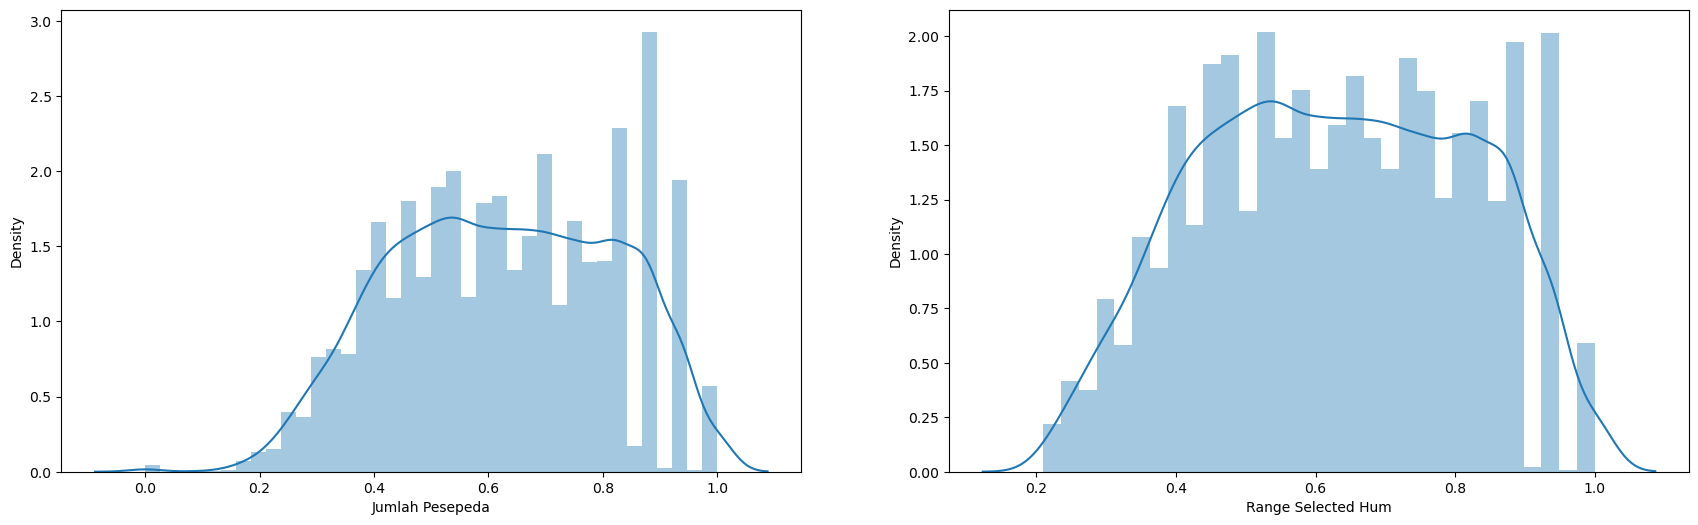

In [956]:
# Melakukan filtering pada data
df_model = df_model[df_model['hum'] > 0.10]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['hum'], ax=axes[0])
sns.distplot(df_model['hum'], ax=axes[1])
axes[0].set_xlabel('Jumlah Pesepeda')
axes[1].set_xlabel('Range Selected Hum')

Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**Cnt**

In [957]:
# Cek deskriptif statistik kolom cnt
round(df_model['cnt'].describe(),0)

count    12098.0
mean       189.0
std        181.0
min          1.0
25%         40.0
50%        142.0
75%        281.0
max        970.0
Name: cnt, dtype: float64

In [958]:
# Cek price > 25 pesepeda
df_model[df_model['cnt'] < 282].count()['cnt']

9074

Terdapat 6044 data yang nilai cnt-nya lebih besar dari 142 (batas 50% persentile ) dan kurang dari 282 (batas 75% persentile ). Oleh karena itu, data yang memiliki cnt kurang dari 142 dan lebih dari 282 tidak akan dimasukkan ke dalam pemodelan dikarenakan kita menhindari nilai outliyer yang signifikan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

Text(0.5, 0, 'Range Selected Cnt')

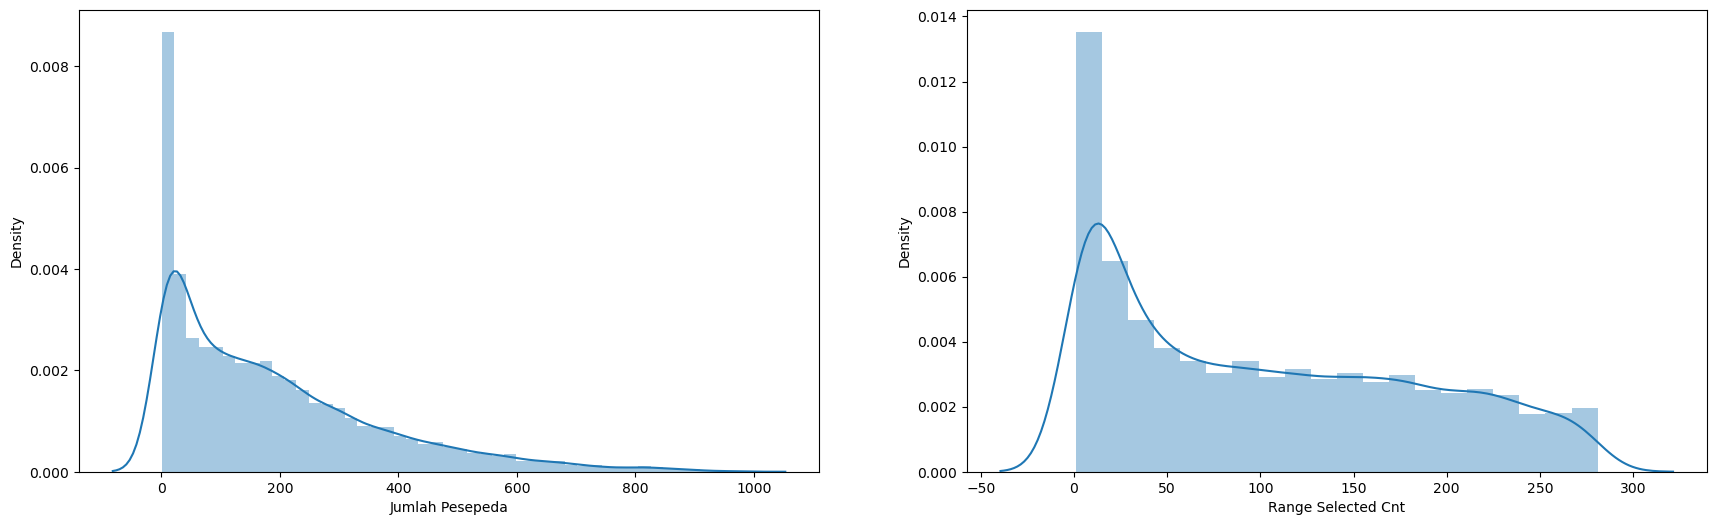

In [959]:
# Melakukan filtering pada data
df_model = df_model[df_model['cnt'] < 282]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['cnt'], ax=axes[0])
sns.distplot(df_model['cnt'], ax=axes[1])
axes[0].set_xlabel('Jumlah Pesepeda')
axes[1].set_xlabel('Range Selected Cnt')

In [960]:
# Cek deskriptif statistik kolom 'cnt' setelah filtering
df_model['cnt'].describe()

count    9074.000000
mean      102.702777
std        83.477239
min         1.000000
25%        23.000000
50%        88.000000
75%       171.000000
max       281.000000
Name: cnt, dtype: float64

In [961]:
#round pada fiture atemp menjadi 2 digit dibelakang koma
df_model['atemp'] = round(df_model['atemp'],2)

**Clean Dataset**

In [962]:
# Cek dataset yang sudah bersih
df_model.head()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt,week
0,0.62,1,0,4,0.35,0.36,16,250,5
1,0.64,1,0,2,0.52,0.54,4,18,0
2,0.53,1,0,2,0.62,0.62,23,107,3
3,0.87,2,0,2,0.35,0.36,8,145,6
5,0.72,1,0,4,0.45,0.46,0,45,1


In [963]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 12163
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         9074 non-null   float64
 1   weathersit  9074 non-null   int64  
 2   holiday     9074 non-null   int64  
 3   season      9074 non-null   int64  
 4   atemp       9074 non-null   float64
 5   temp        9074 non-null   float64
 6   hr          9074 non-null   int64  
 7   cnt         9074 non-null   int64  
 8   week        9074 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 708.9 KB


Pada akhirnya, tersisa 4246 baris data yang akan digunakan untuk pemodelan. Ini berarti lebih dari 50% data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

<Axes: >

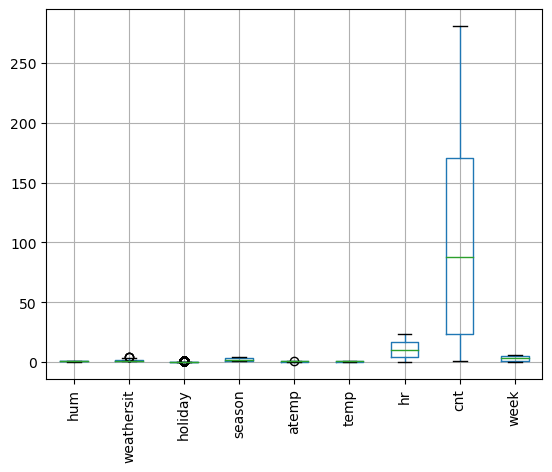

In [964]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90)

### **Modeling**

In [965]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Data Splitting**

In [966]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['cnt'], axis=1)
y = df_model['cnt']

**Train and Test Splitting**

In [967]:
# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.20,
    random_state=1)

In [968]:
#Save train and test data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test])

# Menentukan path file dengan raw string
train_file_path = r'C:\Users\Tofik\Capstone3\src\train_data.csv'
test_file_path = r'C:\Users\Tofik\Capstone3\src\test_data.csv'

train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

**Choose a Benchmark Model**

In [969]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-80.93370405 -80.51191897 -78.33328214 -81.07765237 -78.95482419] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-58.52707047 -58.28943468 -57.07979642 -58.86804504 -57.80472274] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.3205738  -1.36872109 -1.4277302  -1.35226896 -1.34890663] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-55.0541724  -55.15474359 -53.03007749 -54.58321889 -54.53507832] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-38.35634196 -38.20158589 -36.78745732 -37.76421386 -38.42914681] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.

In [970]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-79.962276,1.109813,-58.113814,0.622128,-1.363640,0.035593
1,KNN Regressor,-54.471458,0.761650,-37.907749,0.605820,-0.818745,0.017183
2,DecisionTree Regressor,-51.114091,1.068875,-34.024274,0.622763,-0.538600,0.017246
3,RandomForest Regressor,-38.958429,0.214111,-26.342932,0.421067,-0.397465,0.007235
4,XGBoost Regressor,-37.471937,0.931034,-25.427439,0.605078,-0.375483,0.009455


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [971]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,34.749719,24.279478,0.529842
RandomForest,35.643207,24.559715,0.454193


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang lebih rendah dari RandomForest.


**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [972]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [973]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [974]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [975]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,0.270791,0.019046,0.010872,0.000917,0.9,0.059948,119,8,0.05,5,...,0.601081,1,-0.585317,-0.575202,-0.639165,-0.571146,-0.577251,-0.589616,0.025201,2
20,0.119488,0.010951,0.006782,0.001163,0.9,0.007743,143,4,0.38,6,...,0.491080,3,-0.731236,-0.719492,-0.685699,-0.669808,-0.653838,-0.692015,0.029270,3
17,0.187298,0.010041,0.007580,0.000798,0.6,0.001,190,5,0.04,9,...,0.720720,2,-0.570138,-0.577879,-0.599892,-0.572377,-0.546841,-0.573425,0.016965,1
43,0.180318,0.016931,0.007380,0.000488,0.5,0.16681,172,5,0.31,7,...,0.742749,4,-0.715005,-0.756926,-0.710306,-0.736814,-0.725809,-0.728972,0.016712,4
8,0.228290,0.026879,0.008976,0.000631,0.7,0.021544,182,6,0.31,2,...,0.755067,5,-0.756768,-0.776525,-0.789957,-0.783344,-0.745027,-0.770324,0.016835,5


In [997]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -36.80167211404586
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [977]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,34.907984,24.787123,0.552538


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [978]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,34.749719,24.279478,0.529842


In [979]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,34.907984,24.787123,0.552538


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 34.60, 24.50, 0.53
- RMSE, MAE & MAPE setelah tuning: 34.72, 24.77, 0.53

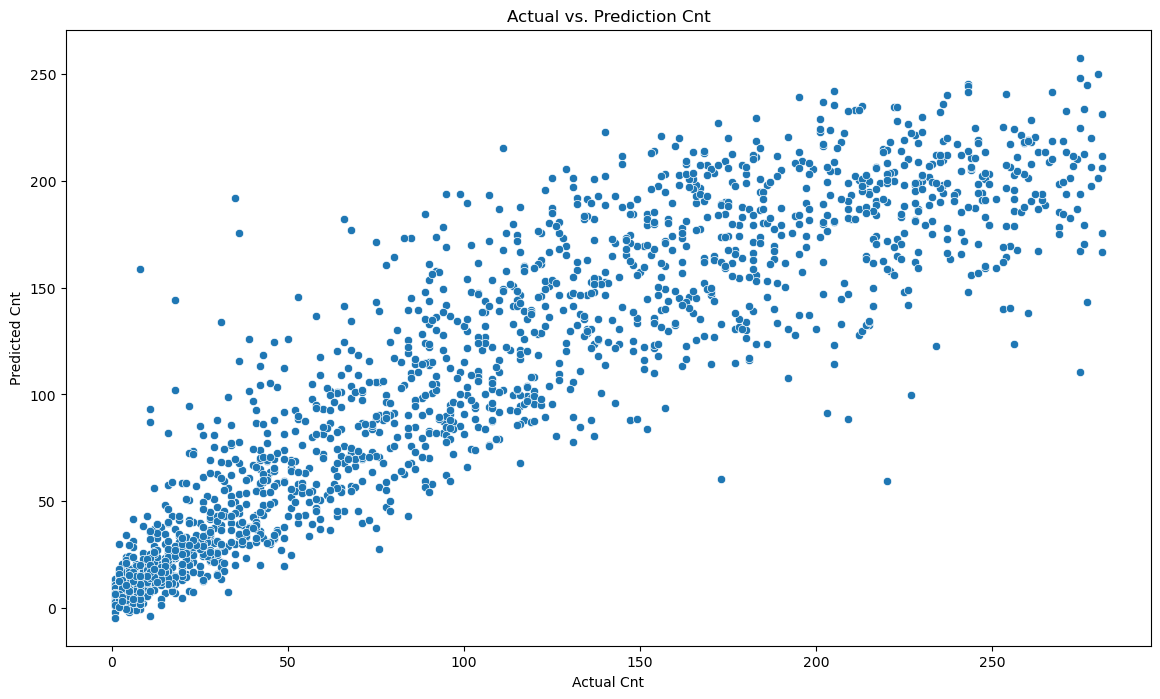

In [986]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Cnt', 
                                               xlabel='Actual Cnt', 
                                               ylabel='Predicted Cnt')

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat cnt aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 54% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (cnt), kita dapat mengeceknya melalui function feature_importances_

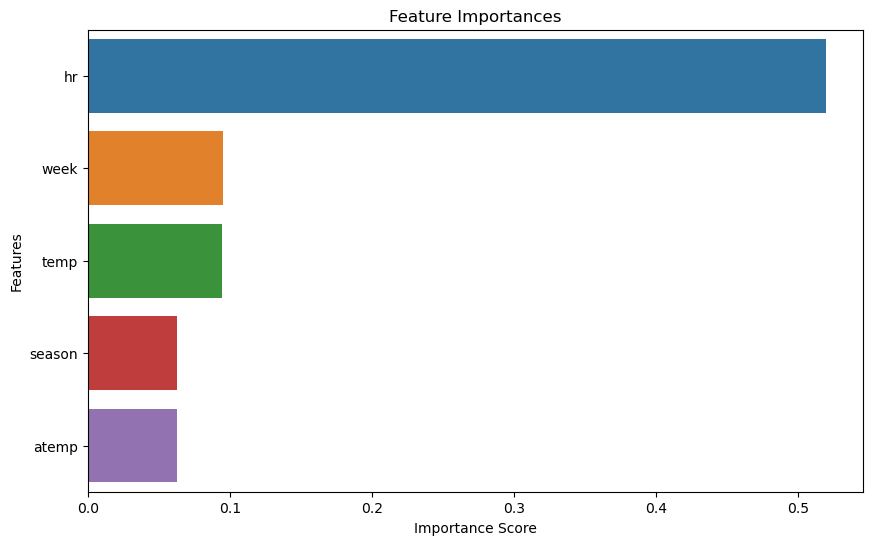

In [981]:
# Misalkan 'X_train' adalah DataFrame yang digunakan untuk melatih model
feature_names = X_train.columns

# Mendapatkan feature importances dari model XGB yang sudah dilatih
xgb_model = xgb_tuning['model']  # pastikan model sudah dilatih
feature_importances = xgb_model.feature_importances_

# Membuat Series untuk feature importances
feature_imp = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False).head()

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.values, y=feature_imp.index)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'hr' disusul dengan weatherlist, week, season dan atemp menjadi fitur yang paling berpengaruh terhadap 'cnt'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~53%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan jumlah sepeda di New York City pada rentang nilai seperti yang dilatih terhadap model (maksimal jumlah 282), maka perkiraan jumlah sepeda akan meleset kurang lebih sebesar 53% dari julah sepeda seharusnya. 
 
 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara cnt aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset kalini.

 Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan jumlah sewa sepeda. Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.  

### **Recommendations**

    Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap lakunya jumlah sepeda jika dibandingkan dengan pemilik sepeda yang menentukan jumlah sepedanya sendiri.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('cnt'), seperti lokasi tempat penyewaan. Selain itu, adanya penambahan data terkini untuk bike sharing tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br>   
4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi update harga sepeda untuk tempat sepeda yang sudah memiliki review. Pembuatan model dengan tujuan seperti ini dapat memanfaatkan data asli rilisan dari bike sharing (yang bukan diambil dari Kaggle) yang mungkin memiliki kolom 'review' dari customer. Jika memang ada, kita dapat melakukan sentiment analysis untuk mendapatkan insight dari review customer tersebut. 

    Dalam prosesnya, tiap review dapat di-assign ke dalam -1 (untuk sentimen negatif) dan 1 (untuk sentimen positif). Nantinya, nilai review yang didapat untuk tiap listing yang sama akan dirata-ratakan, sehingga nantinya nilai akhir untuk tiap listing tersebut dapat kita gunakan sebagai fitur pada model. Pada akhirnya, akurasi prediksi dari model pun bisa lebih baik.

****

#### **Save Model**

In [982]:
#Save model
import pickle

estimator = Pipeline([('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Bike_Sharing_XGB.sav', 'wb'))

In [983]:
#Load model
filename = 'Model_Bike_Sharing_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [984]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

34.7497193417414